## Lead Score Case Study

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:
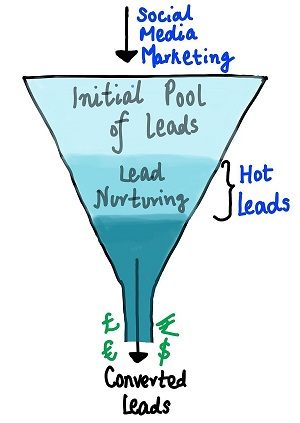

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals of the Case Study
There are quite a few goals for this case study:

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Leads.csv')
df.head(3)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened


## Basic analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


looks like there are outliers present in TotalVisits, Total Time Spent on Website, 	Page Views Per Visit

### Data cleaning

We observe that there are 'Select' values in many columns.It may be because the customer did not select any option from the list, hence it shows 'Select'.'Select' values are as good as NULL. So we can convert these values to null values.

In [5]:
# replace select with np.nan
df = df.replace('Select', np.nan)

In [6]:
# percentage of null values in each column
df.isnull().sum()*100/len(df) 

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [7]:
# drop columns which has more than 40% data missing
df.isnull().sum()[df.isnull().sum()*100/len(df) > 40]

How did you hear about X Education    7250
Lead Quality                          4767
Lead Profile                          6855
Asymmetrique Activity Index           4218
Asymmetrique Profile Index            4218
Asymmetrique Activity Score           4218
Asymmetrique Profile Score            4218
dtype: int64

In [8]:
# included city because it is near to 40 (39.7)
col = ['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score']
df.drop(col, axis=1, inplace=True)

In [9]:
df.shape

(9240, 29)

## EDA

### Univariate analysis

#### Lead Origin
- most of the leads come from Landing Page submission
- Lead add form, lead import and quick add form these categories has very low ratio compared to other two
- Hence combine these 3 categories into other

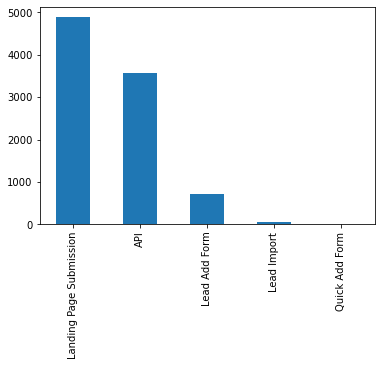

In [10]:
df['Lead Origin'].value_counts().plot.bar()
plt.show()

In [11]:
df['Lead Origin'] = df['Lead Origin'].apply(lambda x: 'Other' if x in ['Lead Add Form','Lead Import','Quick Add Form'] else x)

In [12]:
df['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Other                       774
Name: Lead Origin, dtype: int64

#### Lead Source
- keep columns with more than 100 value and
- add remaining values into other category if count is <100

In [13]:
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

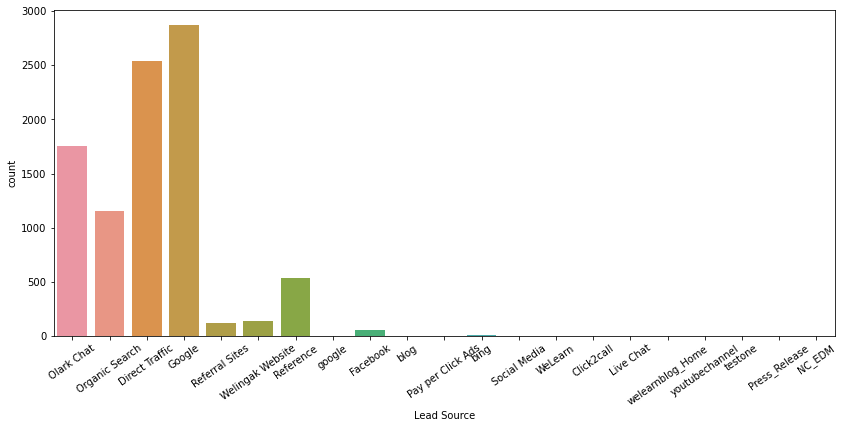

In [14]:
plt.figure(figsize=(14,6))
sns.countplot(df['Lead Source'])
plt.xticks(rotation=35)
plt.show()

In [15]:
# categories with more than 100 values
lst = ['Google','Direct Traffic','Olark Chat','Organic Search','Reference','Welingak Website','Referral Sites']
df['Lead Source'] = df['Lead Source'].apply(lambda x: x if x in lst else 'Other')

In [16]:
df['Lead Source'].value_counts()

Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Other                119
Name: Lead Source, dtype: int64

#### Combine Email and Call columns
- Very few customers have given there email and call option
- email and call both are ways of communicating so no need for separate columns


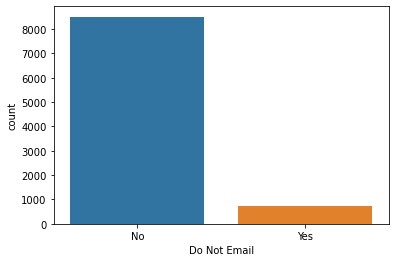

In [17]:
sns.countplot(df['Do Not Email'])
plt.show()

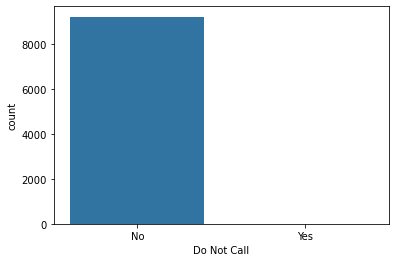

In [18]:
sns.countplot(df['Do Not Call'])
plt.show()

In [19]:
# if 'Yes' exists in either column take it as 1 or 0
df['Email_Call'] = (df['Do Not Email'] == 'Yes') | (df['Do Not Call'] == 'Yes')
df['Email_Call'] = df['Email_Call'].astype(int)

In [20]:
df['Email_Call'].value_counts()

0    8504
1     736
Name: Email_Call, dtype: int64

In [21]:
# drop 'Do Not Email', 'Do Not Call
df.drop(['Do Not Email', 'Do Not Call'],axis=1,inplace=True)

#### Converted

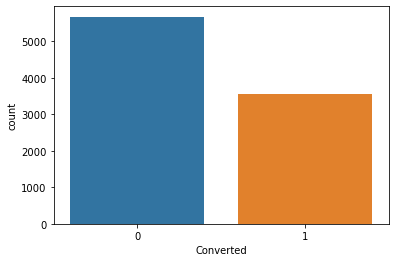

In [22]:
sns.countplot(df['Converted'])
plt.show()

In [23]:
# conversion rate from given data
100*sum(df['Converted'])/len(df['Converted'])

38.53896103896104

#### TotalVisits
- fill the null values with median
- outliers present in TotalVisits
- replace outliers with Q3+1.5*IQR

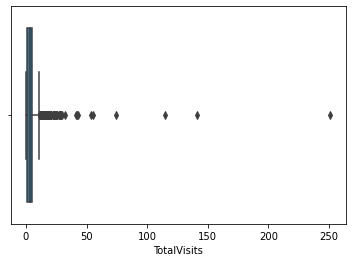

In [24]:
sns.boxplot(df['TotalVisits'])
plt.show()

In [25]:
df['TotalVisits'].isnull().sum()

137

In [26]:
# fill missing values with median
df['TotalVisits'].fillna(df['TotalVisits'].median(),inplace=True)

In [27]:
# create a function which finds upper and lower limit of boxplot
def detect_outlier(var):
    iqr = np.percentile(var,75) - np.percentile(var,25)
    up_tail = np.percentile(var,75)+1.5*iqr
    low_tail = np.percentile(var,25)-1.5*iqr
    return up_tail, low_tail

In [28]:
detect_outlier(df['TotalVisits'])

(11.0, -5.0)

In [29]:
len(df[df['TotalVisits']>11])

267

In [30]:
# use capping here
df['TotalVisits'] = df['TotalVisits'].apply(lambda x: 11 if x>11 else x)

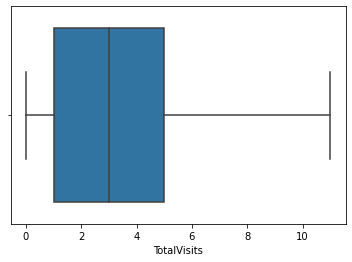

In [31]:
sns.boxplot(df['TotalVisits'])
plt.show()

#### Total Time Spent on Website
- no outliers present
- most of the values are near to zero

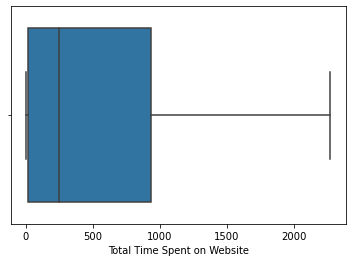

In [32]:
sns.boxplot(df['Total Time Spent on Website'])
plt.show()

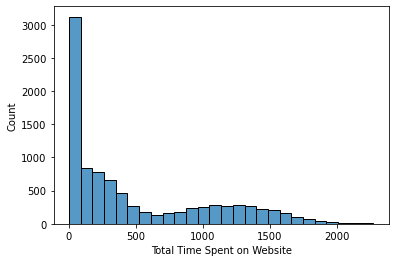

In [33]:
sns.histplot(df['Total Time Spent on Website'])
plt.show()

#### Page Views Per Visit
- missing values replace with median
- outliers present
- use capping and replace outliers with Q3+1.5*IQR

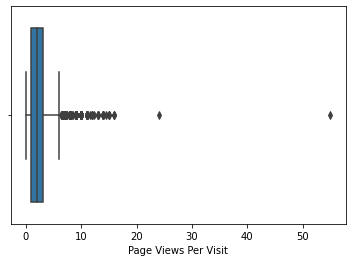

In [34]:
sns.boxplot(df['Page Views Per Visit'])
plt.show()

In [35]:
df['Page Views Per Visit'].isnull().sum()

137

In [36]:
# full with median
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(),inplace=True)

In [37]:
detect_outlier(df['Page Views Per Visit'])

(6.0, -2.0)

In [38]:
len(df[df['Page Views Per Visit']>6])

360

In [39]:
# use capping here
df['Page Views Per Visit']= df['Page Views Per Visit'].apply(lambda x: 6 if x>6 else x)

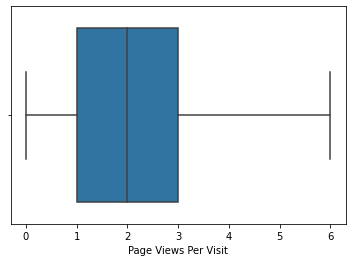

In [40]:
sns.boxplot(df['Page Views Per Visit'])
plt.show()

#### Last Activity
- if count is less than 100 then replace them with other

In [41]:
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

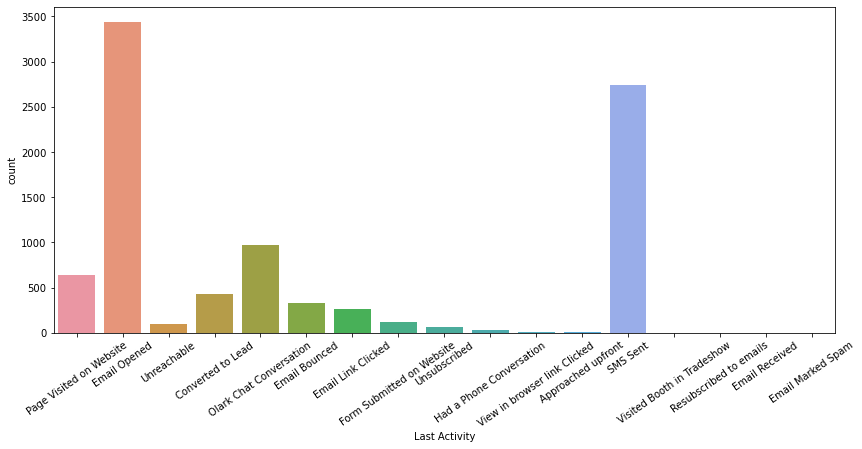

In [42]:
plt.figure(figsize=(14,6))
sns.countplot(df['Last Activity'])
plt.xticks(rotation=35)
plt.show()

In [43]:
# if value is not from below list then convert them to other
last_act = ['Email Opened','SMS Sent','Olark Chat Conversation','Page Visited on Website','Converted to Lead','Email Bounced','Email Link Clicked','Form Submitted on Website']
df['Last Activity'] = df['Last Activity'].apply(lambda x: 'Other' if x not in last_act else x)

In [44]:
df['Last Activity'].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Other                         308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

#### Country
- most of customers are from India
- country don't add much value to the analysis

In [45]:
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

#### Specialization
- 'What is your current occupation' column gives the idea about customer and most of the specialization are missing values hence drop this column

In [46]:
df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

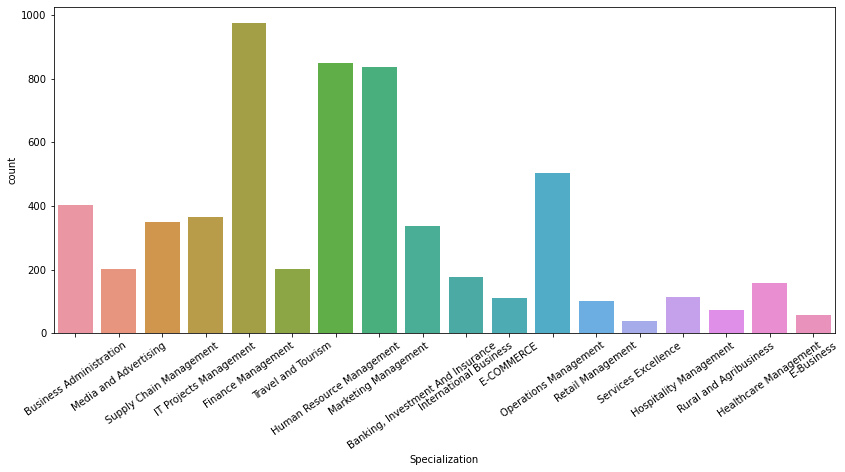

In [47]:
plt.figure(figsize=(14,6))
sns.countplot(df['Specialization'])
plt.xticks(rotation=35)
plt.show()

In [48]:
df['Specialization'].isnull().sum()

3380

In [49]:
df.drop('Specialization',axis=1,inplace=True)

#### What is your current occupation
- replace null values with mode value i.e. Unemployed

In [50]:
df['What is your current occupation'].isnull().sum()

2690

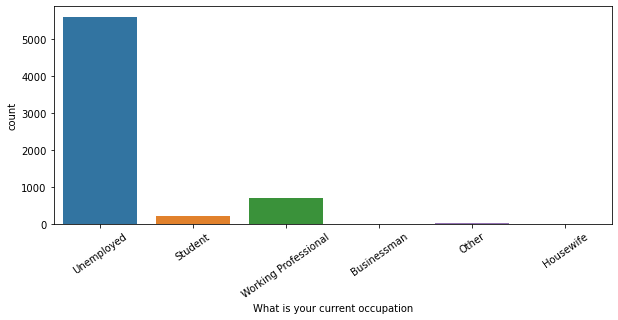

In [51]:
plt.figure(figsize=(10,4))
sns.countplot(df['What is your current occupation'])
plt.xticks(rotation=35)
plt.show()

In [52]:
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [53]:
df['What is your current occupation'].fillna('Unemployed',inplace=True)

#### What matters most to you in choosing a course
- most of the customers are choosing course for Better career prospects
- hence this column don't add much value to analysis

In [54]:
df['What matters most to you in choosing a course'].isnull().sum()

2709

In [55]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#### Bunch of columns
- all below columns don't add any value to the analysis because most of the values are NO, hence drop them
- 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement','Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Get updates on DM Content', 'I agree to pay the amount through cheque'


In [56]:
df['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [57]:
df['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [58]:
df['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [59]:
df['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [60]:
df['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [61]:
df['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [62]:
df['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [63]:
df['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [64]:
df['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [65]:
df['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [66]:
df['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

#### Tags
- replace null values with Will revert after reading the email
- if count is less than 300 replace them with other

In [67]:
df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [68]:
df['Tags'].isnull().sum()

3353

In [69]:
df['Tags'].fillna('Will revert after reading the email',inplace=True)

In [70]:
df['Tags'].value_counts()

Will revert after reading the email                  5425
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [71]:
# if category not in below list replace them with other
tags_keep = ['Will revert after reading the email','Ringing','Interested in other courses','Already a student','Closed by Horizzon']
df['Tags'] = df['Tags'].apply(lambda x: 'Other' if x not in tags_keep else x)

In [72]:
df['Tags'].value_counts()

Will revert after reading the email    5425
Other                                  1276
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Name: Tags, dtype: int64

#### A free copy of Mastering The Interview
- convert Yes:1 and No:0

In [73]:
df['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

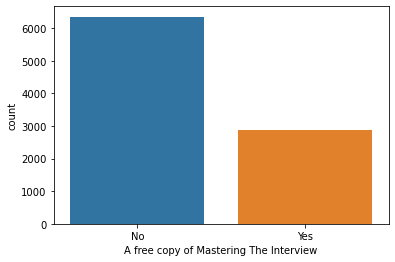

In [74]:
sns.countplot(df['A free copy of Mastering The Interview'])
plt.show()

In [75]:
df['A free copy of Mastering The Interview'] = df['A free copy of Mastering The Interview'].apply(lambda x: 1 if x=='Yes' else 0)

#### Last Notable Activity
- Last activity and last notable activity gives mostly same info
- hence use last notable activity and drop last activity

In [76]:
df['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

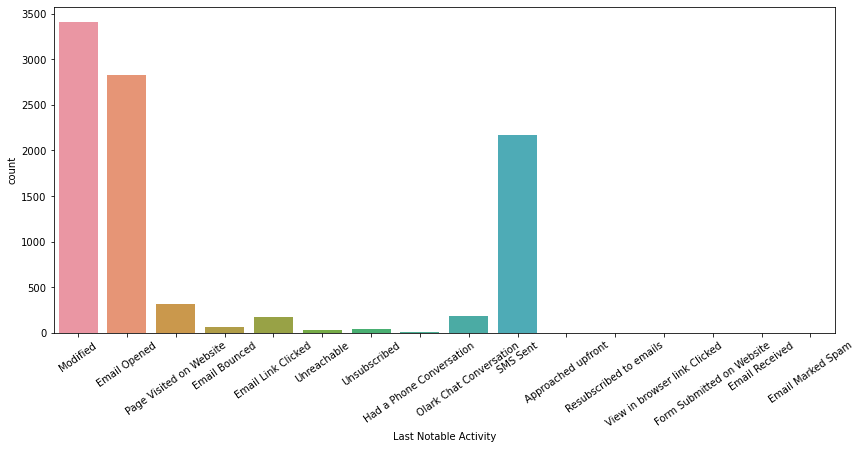

In [77]:
plt.figure(figsize=(14,6))
sns.countplot(df['Last Notable Activity'])
plt.xticks(rotation=35)
plt.show()

In [78]:
# if category is not from below list replace them with other
lst_notable_act = ['Modified','Email Opened', 'SMS Sent', 'Page Visited on Website', 'Olark Chat Conversation', 'Email Link Clicked']
df['Last Notable Activity'] = df['Last Notable Activity'].apply(lambda x: 'Other' if x not in lst_notable_act else x)

#### Columns which are not usefull and we have analysed them in bunch of columns

In [79]:
no_use_col = ['Prospect ID','Lead Number','Last Activity','Country',
              'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses', 
       'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

In [80]:
# drop the columns which are not usefull
df.drop(no_use_col, axis=1,inplace=True)

In [81]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Email_Call'],
      dtype='object')

In [82]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity,Email_Call
0,API,Olark Chat,0,0.0,0,0.0,Unemployed,Interested in other courses,0,Modified,0
1,API,Organic Search,0,5.0,674,2.5,Unemployed,Ringing,0,Email Opened,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Student,Will revert after reading the email,1,Email Opened,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unemployed,Ringing,0,Modified,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Unemployed,Will revert after reading the email,0,Modified,0


In [83]:
df.shape

(9240, 11)

In [84]:
df.isnull().sum()

Lead Origin                               0
Lead Source                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
What is your current occupation           0
Tags                                      0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
Email_Call                                0
dtype: int64

In [85]:
df.head(2)

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity,Email_Call
0,API,Olark Chat,0,0.0,0,0.0,Unemployed,Interested in other courses,0,Modified,0
1,API,Organic Search,0,5.0,674,2.5,Unemployed,Ringing,0,Email Opened,0


In [86]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Email_Call
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.217424,487.698268,2.255105,0.312554,0.079654
std,0.486714,2.860471,548.021466,1.779471,0.463559,0.270771
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000,0.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000,0.000000,0.000000
75%,1.000000,5.000000,936.000000,3.000000,1.000000,0.000000
max,1.000000,11.000000,2272.000000,6.000000,1.000000,1.000000


## Bivariate analysis

### Converted vs Total Time Spent on Website
- people who spend more time on website has higher chances of conversion
- and customers with A free copy of Mastering The Interview has higher chances of conversion

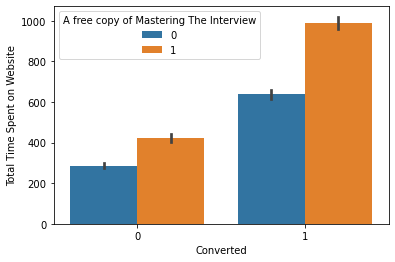

In [87]:
sns.barplot(df['Converted'], df['Total Time Spent on Website'], hue=df['A free copy of Mastering The Interview'])
plt.show()

### Lead origin and converted
- other category customers has more posiblity of conversion

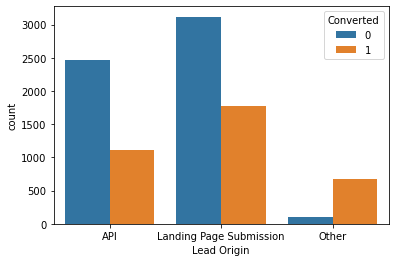

In [88]:
sns.countplot(data=df, x='Lead Origin', hue='Converted')
plt.show()

### Lead source and converted
- customers with Reference and Welingak website are mostly converted 

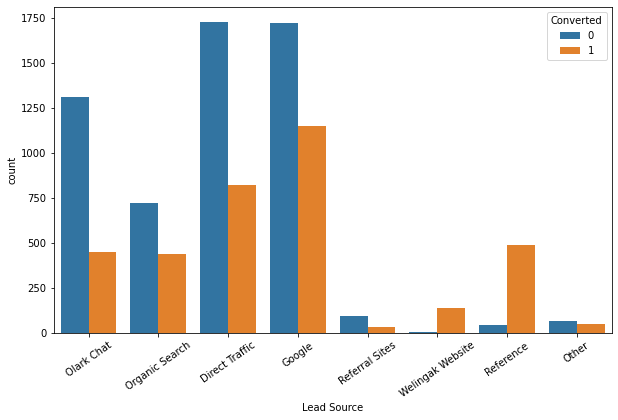

In [89]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Lead Source', hue='Converted')
plt.xticks(rotation=35)
plt.show()

### TotalVisits and convertd
- customers whoes TotalVisits are more are likely to convert

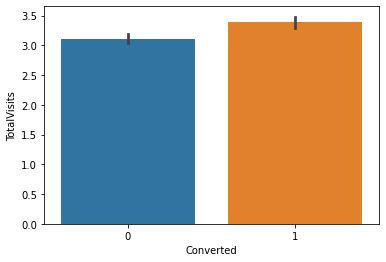

In [90]:
sns.barplot(x=df['Converted'], y=df['TotalVisits'])
plt.show()

### Total Time Spent on Website and converted
- customers who spend more time on website they are converted

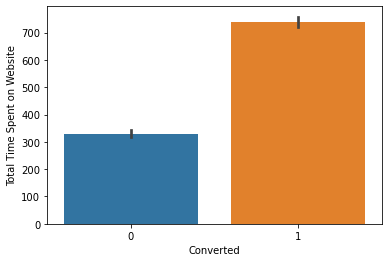

In [91]:
sns.barplot(x=df['Converted'], y=df['Total Time Spent on Website'])
plt.show()

### Page Views Per Visit and converted
- no such difference

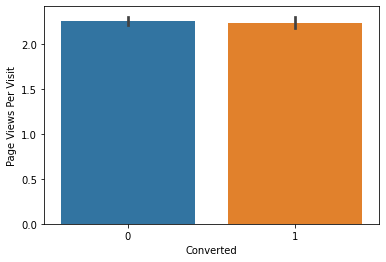

In [92]:
sns.barplot(x=df['Converted'], y=df['Page Views Per Visit'])
plt.show()

### What is your current occupation	and converted
- working professionals have taken the course as compared to other customers

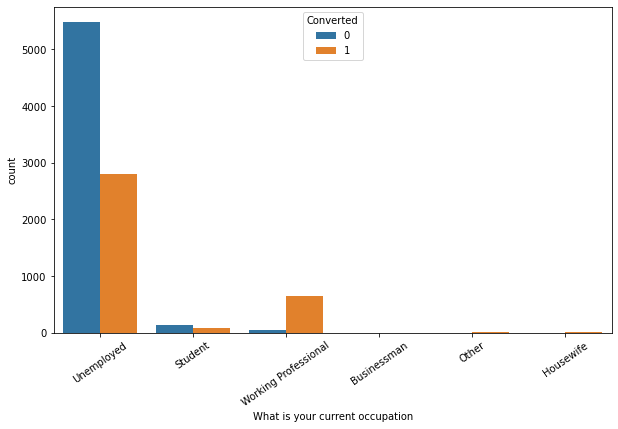

In [93]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='What is your current occupation', hue='Converted')
plt.xticks(rotation=35)
plt.show()

### Tags ana converted
- will revert after reading the email and closed by horizon these tags has more possiblity of conversion

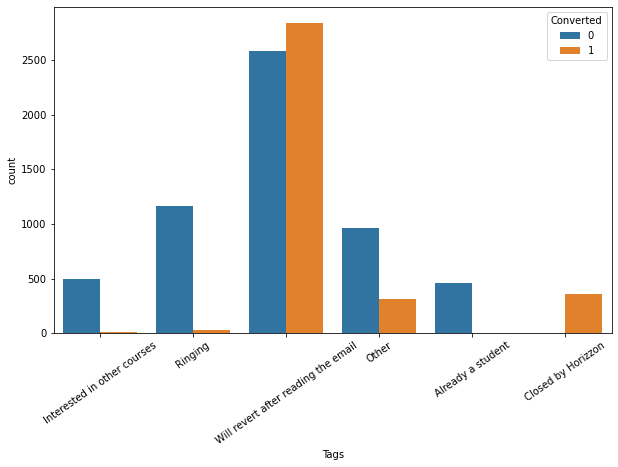

In [94]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Tags', hue='Converted')
plt.xticks(rotation=35)
plt.show()

### A free copy of Mastering The Interview and converted

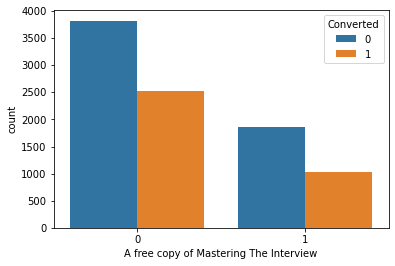

In [95]:
sns.countplot(data=df, x='A free copy of Mastering The Interview', hue='Converted')
plt.show()

### Last Notable Activity and convertd
- customers whoes last notable activity is sms sent are likely to be converted

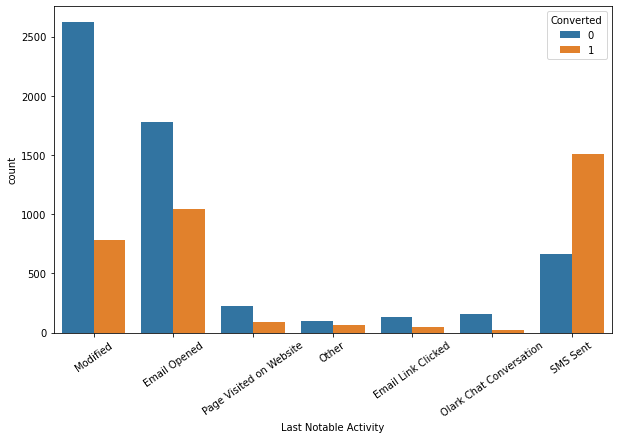

In [96]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Last Notable Activity', hue='Converted')
plt.xticks(rotation=35)
plt.show()

### Email_call and converted

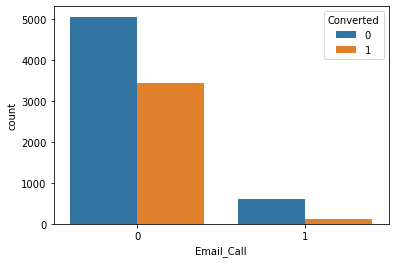

In [97]:
sns.countplot(data=df, x='Email_Call', hue='Converted')
plt.show()

## Multivariate analysis

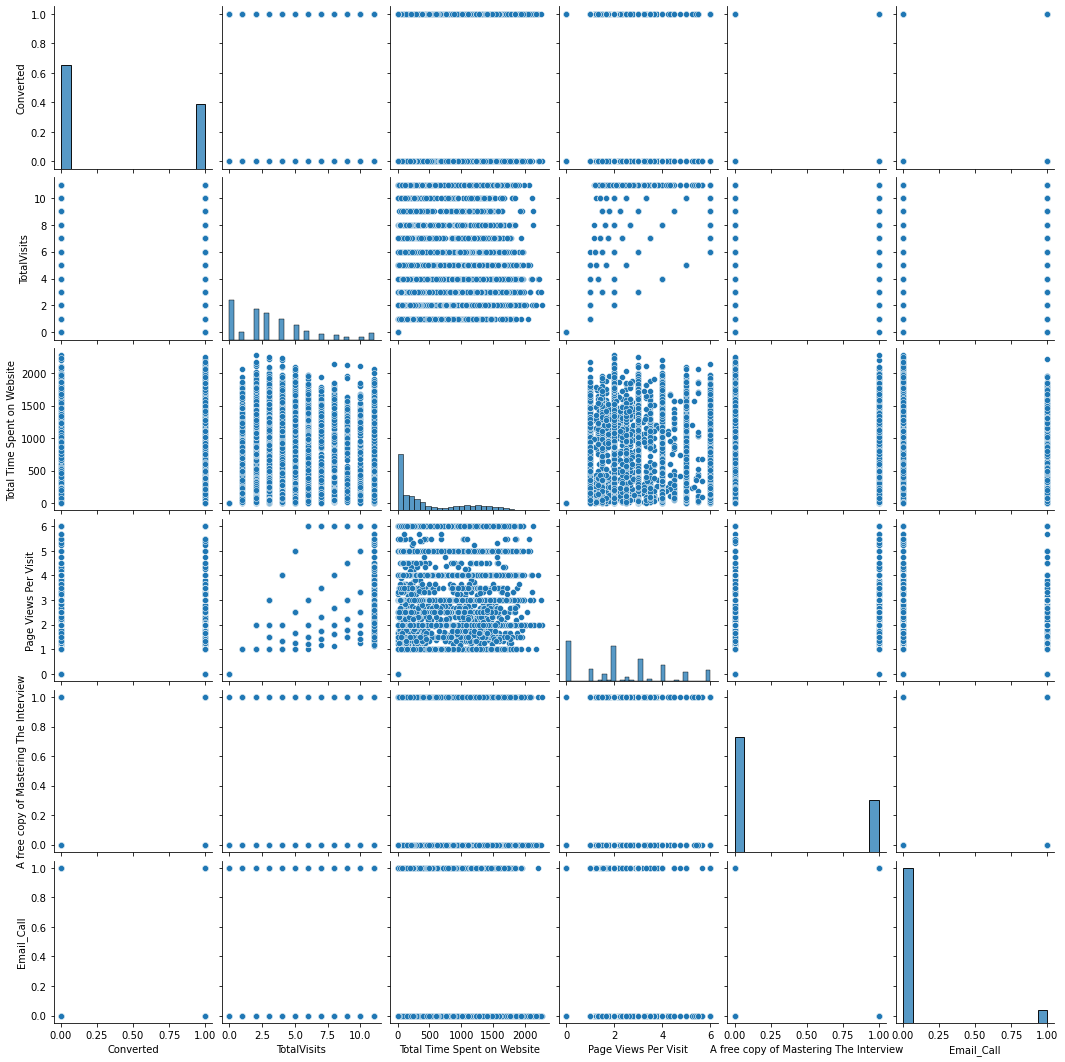

In [98]:
sns.pairplot(df)
plt.show()

## Data Preparation

In [99]:
df.head(2)

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,Tags,A free copy of Mastering The Interview,Last Notable Activity,Email_Call
0,API,Olark Chat,0,0.0,0,0.0,Unemployed,Interested in other courses,0,Modified,0
1,API,Organic Search,0,5.0,674,2.5,Unemployed,Ringing,0,Email Opened,0


In [100]:
# dummy variable creation
new_df = pd.get_dummies(df,prefix=['Lead Origin','Lead Source','What is your current occupation','Tags', 'Last Notable Activity'], drop_first=True)
new_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Email_Call,Lead Origin_Landing Page Submission,Lead Origin_Other,Lead Source_Google,Lead Source_Olark Chat,...,Tags_Interested in other courses,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,1.0,305,1.0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0


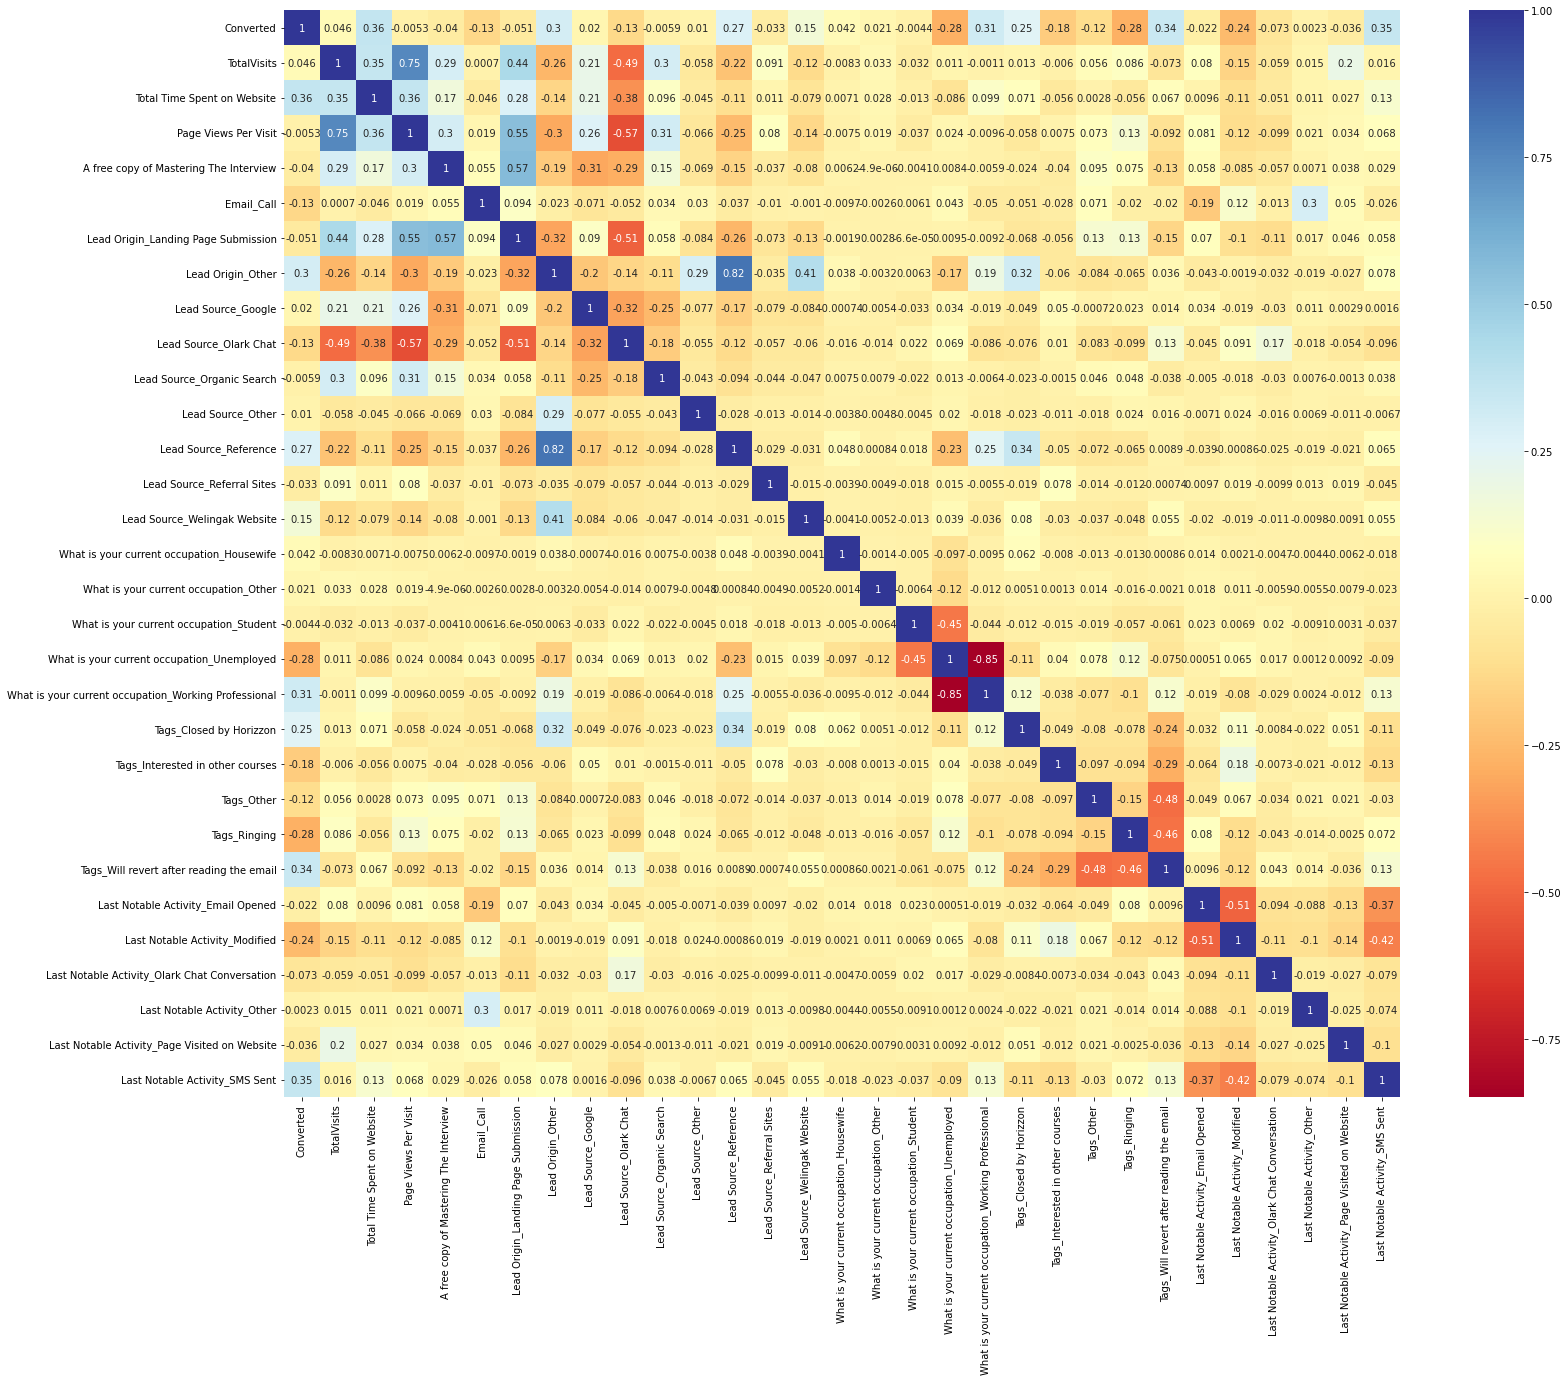

In [101]:
plt.figure(figsize = (25,20))
sns.heatmap(new_df.corr(), annot=True, cmap='RdYlBu')
plt.show()

###  train test split

In [102]:
y = new_df['Converted']
X = new_df.drop('Converted', axis=1)

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### scaling

In [104]:
# scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scale_col = ['TotalVisits' ,'Total Time Spent on Website','Page Views Per Visit']
X_train[scale_col] = scaler.fit_transform(X_train[scale_col])

X_test[scale_col] = scaler.transform(X_test[scale_col])

## Model building

Feature selection using RFE

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logreg = LogisticRegression()

# select top 20 features
rfe = RFE(logreg,20)
rfe = rfe.fit(X_train, y_train)

In [106]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('A free copy of Mastering The Interview', False, 10),
 ('Email_Call', True, 1),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Other', True, 1),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 9),
 ('Lead Source_Other', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 5),
 ('Lead Source_Welingak Website', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 8),
 ('What is your current occupation_Student', False, 2),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('Tags_Closed by Horizzon', True, 1),
 ('Tags_Interested in other courses', True, 1),
 ('Tags_Other', True, 1),
 ('Tags_Ringing', True, 1),
 ('Tags_Will reve

In [107]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Email_Call', 'Lead Origin_Other',
       'Lead Source_Olark Chat', 'Lead Source_Other', 'Lead Source_Reference',
       'Lead Source_Welingak Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Other', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Other',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [108]:
# only take columns given by rfe
X_train = X_train[col]
X_test = X_test[col]

In [109]:
X_train.shape, X_test.shape

((6468, 20), (2772, 20))

### Create some usefull functions 

In [110]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, accuracy_score

In [111]:
# train the model
def train(X_train, y_train):
    X_train_sm = sm.add_constant(X_train) 
    lr = sm.GLM(y_train, X_train_sm, family= sm.families.Binomial())
    lr_model = lr.fit()
    return lr_model

In [112]:
# calculate vif
def vif(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values('VIF', ascending=False)

In [113]:
# model summary
def model_summary(lr_model):
    return lr_model.summary()

In [114]:
# create a function to drop column from training and test set
def drop_column(column_name):
    X_train.drop(column_name,axis=1, inplace=True)
    X_test.drop(column_name,axis=1, inplace=True)

## Model Building
- First drop features with high VIF
- Then drop features with p-value > 0.05

### 1st model

In [115]:
m1 = train(X_train, y_train)

In [116]:
vif(X_train)

,Features,VIF
2,Lead Origin_Other,32.99
5,Lead Source_Reference,24.75
8,What is your current occupation_Unemployed,17.00
14,Tags_Will revert after reading the email,11.36
6,Lead Source_Welingak Website,6.07
4,Lead Source_Other,4.46
12,Tags_Other,3.40
13,Tags_Ringing,3.35
9,What is your current occupation_Working Profes...,2.49
15,Last Notable Activity_Modified,2.27


In [117]:
model_summary(m1)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2070.3
Date:                Fri, 15 Mar 2024   Deviance:                       4140.7
Time:                        11:55:43   Pearson chi2:                 8.35e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.7957      0.632     -6.008      0.000      -5.034      -2.557
Total Time Spent on Website                              1.1036      0.047     23.433      0.000       1.011       1.196
Email_Call                                              -1.5794      0.191     -8.256      0.000      -1.954      -1.204
Lead Origin_Other                                        2.1550      0.694      3.106      0.002       0.795       3.515
Lead Source_Olark Chat                                   0.5370      0.110      4.879      0.000       0.321       0.753
Lead Source_Other                                       -0.2721      0.616     -0.441      0.659      -1.480       0.936
Lead Source_Reference                                    0.9902      0.737      1.343      0.179      -0.455       2.436
Lead Source_Welingak Website                            23.3578   1.27e+04      0.002      0.999    -2.5e+04     2.5e+04
What is your current occupation_Housewife               22.0673   4.22e+04      0.001      1.000   -8.27e+04    8.27e+04
What is your current occupation_Unemployed              -1.2454      0.310     -4.023      0.000      -1.852      -0.639
What is your current occupation_Working Professional     1.2689      0.377      3.363      0.001       0.529       2.008
Tags_Closed by Horizzon                                  9.3322      0.939      9.936      0.000       7.491      11.173
Tags_Interested in other courses                         1.0120      0.701      1.445      0.149      -0.361       2.385
Tags_Other                                               3.4354      0.603      5.695      0.000       2.253       4.618
Tags_Ringing                                             0.1966      0.638      0.308      0.758      -1.054       1.447
Tags_Will revert after reading the email                 4.5589      0.597      7.630      0.000       3.388       5.730
Last Notable Activity_Modified                          -0.8129      0.095     -8.566      0.000      -0.999      -0.627
Last Notable Activity_Olark Chat Conversation           -1.7817      0.347     -5.132      0.000      -2.462      -1.101
Last Notable Activity_Other                              1.3997      0.300      4.661      0.000       0.811       1.988
Last Notable Activity_Page Visited on Website           -0.4203      0.225     -1.864      0.062      -0.862       0.022
Last Notable Activity_SMS Sent                           1.8918      0.109     17.355      0.000       1.678       2.105
========================================================================================================================
"""

In [118]:
drop_column('Lead Origin_Other')

### 2nd model

In [119]:
m2 = train(X_train, y_train)

In [120]:
vif(X_train)

,Features,VIF
7,What is your current occupation_Unemployed,16.99
13,Tags_Will revert after reading the email,11.36
11,Tags_Other,3.40
12,Tags_Ringing,3.35
8,What is your current occupation_Working Profes...,2.49
14,Last Notable Activity_Modified,2.27
10,Tags_Interested in other courses,2.00
9,Tags_Closed by Horizzon,1.92
18,Last Notable Activity_SMS Sent,1.80
2,Lead Source_Olark Chat,1.63


In [121]:
model_summary(m2)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2075.4
Date:                Fri, 15 Mar 2024   Deviance:                       4150.8
Time:                        11:55:44   Pearson chi2:                 8.29e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.8088      0.632     -6.025      0.000      -5.048      -2.570
Total Time Spent on Website                              1.0959      0.047     23.367      0.000       1.004       1.188
Email_Call                                              -1.5428      0.189     -8.143      0.000      -1.914      -1.171
Lead Source_Olark Chat                                   0.5331      0.110      4.851      0.000       0.318       0.749
Lead Source_Other                                        1.3815      0.309      4.466      0.000       0.775       1.988
Lead Source_Reference                                    3.1350      0.260     12.073      0.000       2.626       3.644
Lead Source_Welingak Website                            25.4984   1.27e+04      0.002      0.998    -2.5e+04     2.5e+04
What is your current occupation_Housewife               22.0933   4.22e+04      0.001      1.000   -8.27e+04    8.27e+04
What is your current occupation_Unemployed              -1.2258      0.310     -3.950      0.000      -1.834      -0.618
What is your current occupation_Working Professional     1.2902      0.378      3.416      0.001       0.550       2.030
Tags_Closed by Horizzon                                  9.3306      0.939      9.939      0.000       7.491      11.171
Tags_Interested in other courses                         1.0198      0.700      1.457      0.145      -0.352       2.392
Tags_Other                                               3.4373      0.603      5.701      0.000       2.256       4.619
Tags_Ringing                                             0.2046      0.637      0.321      0.748      -1.045       1.454
Tags_Will revert after reading the email                 4.5572      0.597      7.633      0.000       3.387       5.727
Last Notable Activity_Modified                          -0.8213      0.095     -8.663      0.000      -1.007      -0.635
Last Notable Activity_Olark Chat Conversation           -1.7827      0.347     -5.143      0.000      -2.462      -1.103
Last Notable Activity_Other                              1.3529      0.299      4.532      0.000       0.768       1.938
Last Notable Activity_Page Visited on Website           -0.4257      0.225     -1.891      0.059      -0.867       0.015
Last Notable Activity_SMS Sent                           1.8870      0.109     17.338      0.000       1.674       2.100
========================================================================================================================
"""

In [122]:
drop_column('What is your current occupation_Unemployed')

### 3rd model

In [123]:
m3 = train(X_train, y_train)

In [124]:
vif(X_train)

,Features,VIF
12,Tags_Will revert after reading the email,2.56
13,Last Notable Activity_Modified,2.16
17,Last Notable Activity_SMS Sent,1.77
2,Lead Source_Olark Chat,1.62
4,Lead Source_Reference,1.37
8,Tags_Closed by Horizzon,1.35
10,Tags_Other,1.33
0,Total Time Spent on Website,1.33
1,Email_Call,1.26
7,What is your current occupation_Working Profes...,1.22


In [125]:
model_summary(m3)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2083.5
Date:                Fri, 15 Mar 2024   Deviance:                       4167.1
Time:                        11:55:45   Pearson chi2:                 8.27e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.8150      0.593     -8.118      0.000      -5.978      -3.653
Total Time Spent on Website                              1.1005      0.047     23.491      0.000       1.009       1.192
Email_Call                                              -1.5275      0.189     -8.067      0.000      -1.899      -1.156
Lead Source_Olark Chat                                   0.5341      0.110      4.872      0.000       0.319       0.749
Lead Source_Other                                        1.3824      0.307      4.503      0.000       0.781       1.984
Lead Source_Reference                                    3.2050      0.257     12.474      0.000       2.701       3.709
Lead Source_Welingak Website                            25.4800   1.28e+04      0.002      0.998    -2.5e+04     2.5e+04
What is your current occupation_Housewife               23.2891   4.21e+04      0.001      1.000   -8.25e+04    8.26e+04
What is your current occupation_Working Professional     2.4861      0.226     11.009      0.000       2.044       2.929
Tags_Closed by Horizzon                                  9.1300      0.937      9.749      0.000       7.294      10.966
Tags_Interested in other courses                         0.8540      0.698      1.223      0.221      -0.514       2.222
Tags_Other                                               3.2487      0.600      5.412      0.000       2.072       4.425
Tags_Ringing                                            -0.0121      0.634     -0.019      0.985      -1.255       1.230
Tags_Will revert after reading the email                 4.3622      0.594      7.344      0.000       3.198       5.526
Last Notable Activity_Modified                          -0.8276      0.095     -8.750      0.000      -1.013      -0.642
Last Notable Activity_Olark Chat Conversation           -1.8091      0.347     -5.218      0.000      -2.489      -1.130
Last Notable Activity_Other                              1.3196      0.298      4.431      0.000       0.736       1.903
Last Notable Activity_Page Visited on Website           -0.4382      0.224     -1.954      0.051      -0.878       0.001
Last Notable Activity_SMS Sent                           1.8708      0.108     17.250      0.000       1.658       2.083
========================================================================================================================
"""

In [126]:
drop_column('Lead Source_Welingak Website')

### 4th model

In [127]:
m4 = train(X_train, y_train)

In [128]:
vif(X_train)

,Features,VIF
11,Tags_Will revert after reading the email,2.53
12,Last Notable Activity_Modified,2.16
16,Last Notable Activity_SMS Sent,1.77
2,Lead Source_Olark Chat,1.60
4,Lead Source_Reference,1.36
7,Tags_Closed by Horizzon,1.33
9,Tags_Other,1.33
0,Total Time Spent on Website,1.30
1,Email_Call,1.26
6,What is your current occupation_Working Profes...,1.22


In [129]:
model_summary(m4)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2156.5
Date:                Fri, 15 Mar 2024   Deviance:                       4313.1
Time:                        11:55:46   Pearson chi2:                 8.22e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.7110      0.591     -7.971      0.000      -5.869      -3.553
Total Time Spent on Website                              1.0161      0.045     22.475      0.000       0.928       1.105
Email_Call                                              -1.4293      0.180     -7.931      0.000      -1.782      -1.076
Lead Source_Olark Chat                                   0.3511      0.107      3.282      0.001       0.141       0.561
Lead Source_Other                                        1.2137      0.305      3.977      0.000       0.615       1.812
Lead Source_Reference                                    3.0314      0.256     11.854      0.000       2.530       3.533
What is your current occupation_Housewife               21.2224   1.54e+04      0.001      0.999   -3.02e+04    3.02e+04
What is your current occupation_Working Professional     2.4188      0.225     10.750      0.000       1.978       2.860
Tags_Closed by Horizzon                                  9.3252      0.933      9.994      0.000       7.496      11.154
Tags_Interested in other courses                         0.8501      0.695      1.223      0.221      -0.512       2.212
Tags_Other                                               3.1966      0.598      5.344      0.000       2.024       4.369
Tags_Ringing                                            -0.0557      0.632     -0.088      0.930      -1.294       1.183
Tags_Will revert after reading the email                 4.3751      0.592      7.390      0.000       3.215       5.535
Last Notable Activity_Modified                          -0.8281      0.093     -8.937      0.000      -1.010      -0.647
Last Notable Activity_Olark Chat Conversation           -1.7954      0.342     -5.252      0.000      -2.465      -1.125
Last Notable Activity_Other                              1.1916      0.292      4.074      0.000       0.618       1.765
Last Notable Activity_Page Visited on Website           -0.4461      0.218     -2.042      0.041      -0.874      -0.018
Last Notable Activity_SMS Sent                           1.8966      0.107     17.732      0.000       1.687       2.106
========================================================================================================================
"""

In [130]:
drop_column('What is your current occupation_Housewife')

### 5th model 

In [131]:
m5 = train(X_train, y_train)

In [132]:
vif(X_train)

,Features,VIF
10,Tags_Will revert after reading the email,2.52
11,Last Notable Activity_Modified,2.16
15,Last Notable Activity_SMS Sent,1.77
2,Lead Source_Olark Chat,1.60
4,Lead Source_Reference,1.36
8,Tags_Other,1.33
6,Tags_Closed by Horizzon,1.32
0,Total Time Spent on Website,1.30
1,Email_Call,1.26
5,What is your current occupation_Working Profes...,1.22


In [133]:
model_summary(m5)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2158.2
Date:                Fri, 15 Mar 2024   Deviance:                       4316.4
Time:                        11:55:46   Pearson chi2:                 8.24e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.7116      0.591     -7.972      0.000      -5.870      -3.553
Total Time Spent on Website                              1.0174      0.045     22.509      0.000       0.929       1.106
Email_Call                                              -1.4310      0.180     -7.940      0.000      -1.784      -1.078
Lead Source_Olark Chat                                   0.3497      0.107      3.270      0.001       0.140       0.559
Lead Source_Other                                        1.2123      0.305      3.972      0.000       0.614       1.810
Lead Source_Reference                                    3.0394      0.255     11.901      0.000       2.539       3.540
What is your current occupation_Working Professional     2.4165      0.225     10.738      0.000       1.975       2.858
Tags_Closed by Horizzon                                  9.3365      0.933     10.007      0.000       7.508      11.165
Tags_Interested in other courses                         0.8498      0.695      1.223      0.222      -0.513       2.212
Tags_Other                                               3.1971      0.598      5.345      0.000       2.025       4.369
Tags_Ringing                                            -0.0557      0.632     -0.088      0.930      -1.295       1.183
Tags_Will revert after reading the email                 4.3781      0.592      7.395      0.000       3.218       5.538
Last Notable Activity_Modified                          -0.8269      0.093     -8.931      0.000      -1.008      -0.645
Last Notable Activity_Olark Chat Conversation           -1.7974      0.342     -5.257      0.000      -2.467      -1.127
Last Notable Activity_Other                              1.1909      0.293      4.070      0.000       0.617       1.764
Last Notable Activity_Page Visited on Website           -0.4481      0.219     -2.050      0.040      -0.876      -0.020
Last Notable Activity_SMS Sent                           1.8955      0.107     17.720      0.000       1.686       2.105
========================================================================================================================
"""

In [134]:
drop_column('Tags_Ringing')

### 6th model

In [135]:
m6 = train(X_train, y_train)

In [136]:
vif(X_train)

,Features,VIF
9,Tags_Will revert after reading the email,2.33
10,Last Notable Activity_Modified,2.01
2,Lead Source_Olark Chat,1.60
14,Last Notable Activity_SMS Sent,1.55
4,Lead Source_Reference,1.36
6,Tags_Closed by Horizzon,1.31
0,Total Time Spent on Website,1.30
8,Tags_Other,1.29
1,Email_Call,1.26
5,What is your current occupation_Working Profes...,1.22


In [137]:
model_summary(m6)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2158.2
Date:                Fri, 15 Mar 2024   Deviance:                       4316.4
Time:                        11:55:47   Pearson chi2:                 8.24e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.7602      0.220    -21.642      0.000      -5.191      -4.329
Total Time Spent on Website                              1.0174      0.045     22.509      0.000       0.929       1.106
Email_Call                                              -1.4307      0.180     -7.940      0.000      -1.784      -1.078
Lead Source_Olark Chat                                   0.3499      0.107      3.272      0.001       0.140       0.559
Lead Source_Other                                        1.2123      0.305      3.972      0.000       0.614       1.811
Lead Source_Reference                                    3.0385      0.255     11.910      0.000       2.538       3.539
What is your current occupation_Working Professional     2.4170      0.225     10.741      0.000       1.976       2.858
Tags_Closed by Horizzon                                  9.3852      0.753     12.463      0.000       7.909      10.861
Tags_Interested in other courses                         0.8985      0.425      2.114      0.034       0.066       1.731
Tags_Other                                               3.2460      0.229     14.201      0.000       2.798       3.694
Tags_Will revert after reading the email                 4.4269      0.216     20.504      0.000       4.004       4.850
Last Notable Activity_Modified                          -0.8271      0.093     -8.937      0.000      -1.009      -0.646
Last Notable Activity_Olark Chat Conversation           -1.7976      0.342     -5.258      0.000      -2.468      -1.128
Last Notable Activity_Other                              1.1905      0.293      4.069      0.000       0.617       1.764
Last Notable Activity_Page Visited on Website           -0.4482      0.219     -2.051      0.040      -0.877      -0.020
Last Notable Activity_SMS Sent                           1.8945      0.106     17.820      0.000       1.686       2.103
========================================================================================================================
"""

All features now has VIF < 5 and p-value < 0.05

### compute required metrics

In [138]:
def calculate_metrics(X_train, y_train, lr_model, threshold=0.5):
    X_train_sm = sm.add_constant(X_train)
    y_train_pred = lr_model.predict(X_train_sm).values.reshape(-1)
    y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Conve_prob': y_train_pred})
    y_train_pred_final['CustId'] = y_train.index
    y_train_pred_final['Predicted'] = y_train_pred_final.Conve_prob.map(lambda x: 1 if x > threshold else 0)

    # Confusion matrix
    confusion = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])

    accuracy = accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])

    # Calculate other metrics
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    sensitivity = recall = TP / (TP + FN)
    specificity = TN / (TN + FP)
    precision = TP / (TP + FP)

    # Format metrics into a string
    metrics_str = (
        f"Dataframe:\n {y_train_pred_final.head()}\n"
        "\nConfusion metrics:\n"
        f"{confusion}\n"
        f"\nAccuracy score: {accuracy}\n"
        f"\nPrecision: {precision}\n"
        f"\nSensitivity/ Recall: {recall}\n"
        f"\nSpecificity: {specificity}"
    )

    # Return all values
    return y_train_pred_final, confusion, accuracy, precision, recall, specificity, metrics_str

In [139]:
met_cal = calculate_metrics(X_train, y_train,m6)
print(met_cal[-1])

Dataframe:
    Converted  Conve_prob  CustId  Predicted
0          0    0.291859    4715          0
1          1    0.746093    7132          1
2          0    0.045172    8954          0
3          0    0.113619    5283          0
4          0    0.609996    3003          1

Confusion metrics:
[[3648  336]
 [ 551 1933]]

Accuracy score: 0.8628633271490415

Precision: 0.8519171441163508

Sensitivity/ Recall: 0.7781803542673108

Specificity: 0.9156626506024096


In [140]:
y_train_pred_final, confusion, accuracy, precision, recall, specificity = met_cal[0], met_cal[1], met_cal[2], met_cal[3], met_cal[4], met_cal[5]

### Plotting the ROC curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [141]:
from sklearn import metrics
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [142]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conve_prob, drop_intermediate = False )

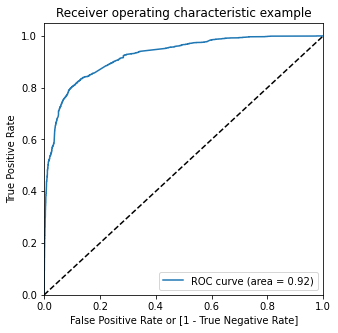

In [143]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conve_prob)

area under the curve is 0.92 

### Finding optimal cutoff point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [144]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conve_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conve_prob,CustId,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.291859,4715,0,1,1,1,0,0,0,0,0,0,0
1,1,0.746093,7132,1,1,1,1,1,1,1,1,1,0,0
2,0,0.045172,8954,0,1,0,0,0,0,0,0,0,0,0
3,0,0.113619,5283,0,1,1,0,0,0,0,0,0,0,0
4,0,0.609996,3003,1,1,1,1,1,1,1,1,0,0,0


In [145]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384045  1.000000  0.000000
0.1   0.1  0.674242  0.967794  0.491215
0.2   0.2  0.787724  0.929549  0.699297
0.3   0.3  0.837972  0.854267  0.827811
0.4   0.4  0.858380  0.818841  0.883032
0.5   0.5  0.862863  0.778180  0.915663
0.6   0.6  0.860853  0.737118  0.938002
0.7   0.7  0.845393  0.666264  0.957078
0.8   0.8  0.805813  0.524557  0.981175
0.9   0.9  0.771490  0.417874  0.991968


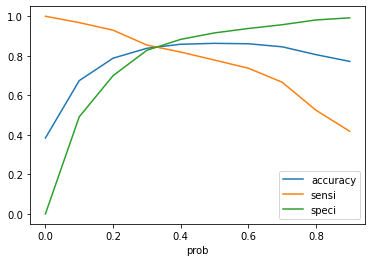

In [146]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

from above graph we will take cutoff point as 0.34

In [155]:
met_cal_2 = calculate_metrics(X_train, y_train, m6, 0.34)
print(met_cal_2[-1])

Dataframe:
    Converted  Conve_prob  CustId  Predicted
0          0    0.291859    4715          0
1          1    0.746093    7132          1
2          0    0.045172    8954          0
3          0    0.113619    5283          0
4          0    0.609996    3003          1

Confusion metrics:
[[3399  585]
 [ 392 2092]]

Accuracy score: 0.8489486703772418

Precision: 0.7814717967874486

Sensitivity/ Recall: 0.8421900161030595

Specificity: 0.8531626506024096


### Precision and recall tradeoff

In [148]:
from sklearn.metrics import precision_recall_curve

In [149]:
y_train_pred_final, confusion, accuracy, precision, recall, specificity = met_cal_2[0], met_cal_2[1], met_cal_2[2], met_cal_2[3], met_cal_2[4], met_cal_2[5]

In [150]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6463    0
 6464    0
 6465    1
 6466    0
 6467    1
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       1
        ..
 6463    0
 6464    0
 6465    1
 6466    0
 6467    1
 Name: Predicted, Length: 6468, dtype: int64)

In [151]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Predicted)

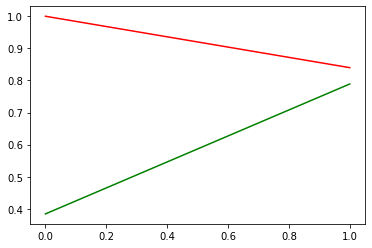

In [152]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

- **The green line represents precision.** It starts at a high value (close to 1) and stays relatively high throughout the curve. This indicates the model is accurate in identifying positive cases (converted customers).
- **The red line represents recall.** It starts at a lower value and increases steadily as the threshold for classifying a customer as "converted" decreases. This suggests the model is able to capture an increasing number of relevant cases (true positives) as it becomes more lenient in its classifications.

Overall, the non-overlapping curves with a good balance between precision and recall suggest a well-performing model.

## Test set prediction and result

In [156]:
test_set_cal = calculate_metrics(X_test, y_test, m6, 0.34)
print(test_set_cal[-1])

Dataframe:
    Converted  Conve_prob  CustId  Predicted
0          1    0.985070    4608          1
1          0    0.145354    7935          0
2          0    0.029586    4043          0
3          0    0.066162    7821          0
4          0    0.296602     856          0

Confusion metrics:
[[1437  258]
 [ 162  915]]

Accuracy score: 0.8484848484848485

Precision: 0.7800511508951407

Sensitivity/ Recall: 0.8495821727019499

Specificity: 0.8477876106194691
